#Primeiro Trabalho - Grafos e Redes Sociais

##1. Import de Bibliotecas

In [156]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

##2. Desenvolvimento do Trabalho

###2.1. Criando GridLine:

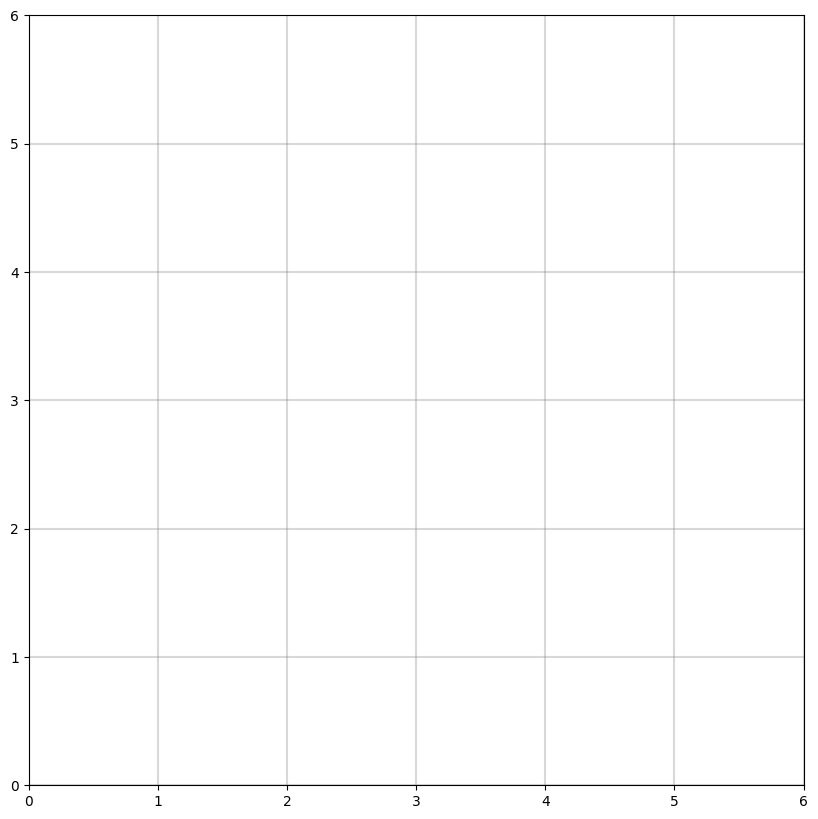

In [157]:
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = 6
n_cols = 6

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)

#ax.set_xticks([])
#ax.set_yticks([])

plt.show()

###2.2. Setando Matriz

In [158]:
# Mapeamento de números para formas geométricas
numberToLetter = {1: 'C', 2: 'Q', 3: 'T', 4: 'E'}

# Matriz de entrada
MATRIZ = [
    [2, 3, 1, 3, 1, 2],
    [3, 3, 2, 1, 2, 3],
    [1, 2, 3, 2, 3, 1],
    [3, 1, 2, 2, 3, 3],
    [1, 2, 3, 2, 3, 1],
    [2, 3, 1, 1, 2, 3]
]

# Função para verificar se uma posição está dentro dos limites da matriz
def dentro_limites(x, y):
    return 0 <= x < len(MATRIZ[0]) and 0 <= y < len(MATRIZ)

###2.3. Plotando Tabela de Acordo com Matriz

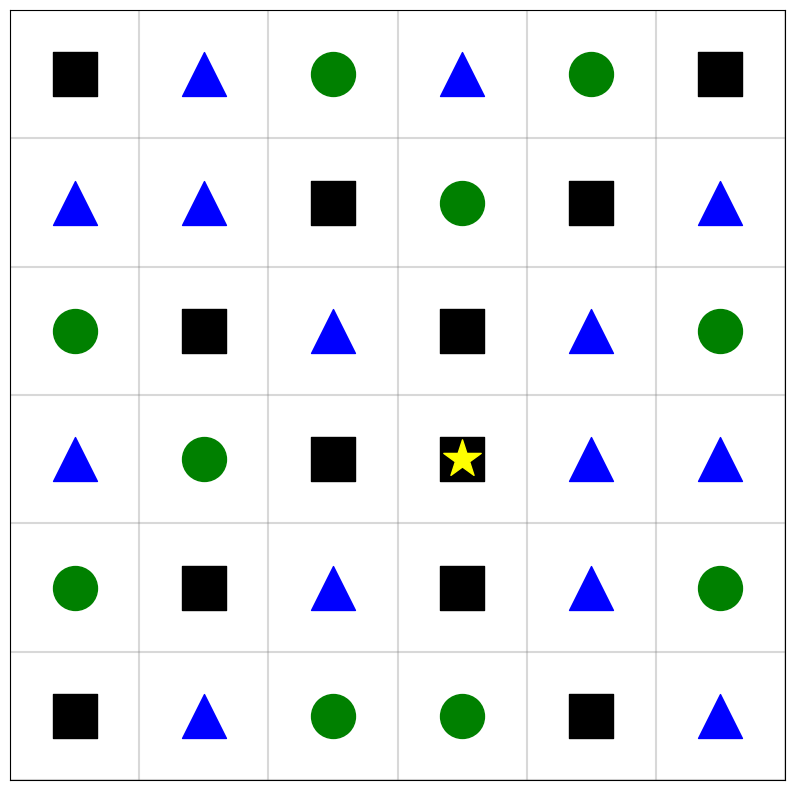

In [159]:
#Salva a pos e seta a forma
nodes = []
i = 0
posColuna = 0
for linha in MATRIZ:
  for coluna in linha:
    posLinha =  abs(i-5) # 0 = 5, 1= 4, 2=3, 3=2, 4=1, 5=0
    simbolo = MATRIZ[i][posColuna]
    simbolo = numberToLetter[simbolo]
    nodes.append((posColuna, posLinha, simbolo))
    posColuna += 1
  posColuna = 0
  i += 1

#Formata para o formato 05Q: (0,5)
pos = dict()
nodeNames = []
for i,j,s in nodes:
  node = str(i)+str(j)+str(s)
  nodeNames.append(node)
  pos[node] = (i,j)

#Criação de Grafo
GraphTest = nx.DiGraph()
GraphTest.add_nodes_from(nodeNames)

#Set das Formas
quadrados = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'Q']
circulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'C']
triangulos = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'T']
especial = [str(i)+str(j)+str(s) for i,j,s in nodes if s == 'E']

#Gridline
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = 6
n_cols = 6

for i in range(n_rows + 1):
    ax.axhline(y=i, color='gray', linestyle='-', alpha=0.3)
for j in range(n_cols + 1):
    ax.axvline(x=j, color='gray', linestyle='-', alpha=0.3)

#Centraliza
pos = {}
for i,j,s in nodes:
    node = str(i)+str(j)+str(s)
    pos[node] = (i + 0.5, j + 0.5)

#Plota as formas
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= quadrados,
                      node_color='black',
                      node_shape='s',
                      node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= triangulos,
                      node_color='blue',
                      node_shape='^',
                      node_size=1000)
nx.draw_networkx_nodes(GraphTest, pos,
                      nodelist= circulos,
                      node_color='green',
                      node_shape='o',
                      node_size=1000)

#Plota a Estrela por cima
plt.scatter(pos['32Q'][0], pos['32Q'][1], color='yellow', marker='*', s=800, zorder=3)

#Seta
#nx.draw_networkx_edges(Graph, pos, edge_color='black', arrows=True, arrowsize=20)

#Definições
ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
#ax.set_xticks([])
#ax.set_yticks([])
plt.show()

###2.4. Definição de Regras

Regras:

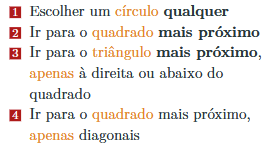

In [160]:
# Mapeamento de números para formas geométricas
numberToLetter = {1: 'C', 2: 'Q', 3: 'T'}

# Matriz de entrada
MATRIZ = [
    [2, 2, 1, 3, 1, 2],
    [3, 3, 2, 1, 2, 3],
    [1, 2, 3, 2, 3, 1],
    [3, 1, 2, 2, 3, 3],
    [1, 2, 3, 2, 3, 1],
    [2, 3, 1, 1, 2, 3]
]

# Criação do grafo direcionado
GraphTestRules = nx.DiGraph()

In [161]:
# Regra 1: Encontrar todos os quadrados mais próximos (incluindo diagonais)
def encontrar_quadrados(circulo_x, circulo_y):
    quadrados_proximos = []
    dist_min = float('inf')

    for y in range(len(MATRIZ)):
        for x in range(len(MATRIZ[0])):
            if MATRIZ[y][x] == 2: # Quadrado
                dist = abs(circulo_x - x) + abs(circulo_y - y)
                if abs(circulo_x - x) == abs(circulo_y - y):
                  dist = dist/2
                if dist < dist_min:
                    dist_min = dist
                    quadrados_proximos = [(x, y)]
                elif dist == dist_min:
                    quadrados_proximos.append((x, y))

    return quadrados_proximos

# Regra 2: Encontrar o triângulo mais próximo à direita ou abaixo
def encontrar_triangulo(quadrado_x, quadrado_y):
    triangulo_mais_proximo = []
    dist_min = float('inf')

    for y in range(len(MATRIZ)):
        for x in range(len(MATRIZ[0])):
            if MATRIZ[y][x] == 3: # Triângulo
                if x >= quadrado_x and y >= quadrado_y: # Apenas direita ou abaixo
                    dist = abs(quadrado_x - x) + abs(quadrado_y - y)
                    if dist < dist_min:
                        dist_min = dist
                        triangulo_mais_proximo = [(x, y)]
                    elif dist == dist_min:
                        triangulo_mais_proximo.append((x, y))

    return triangulo_mais_proximo

# Regra 3: Encontrar o quadrado mais próximo nas diagonais
def encontrar_quadrado_diagonal(triangulo_x, triangulo_y):
  quadrado_diagonal = []
  x = 1
  y = 0
  while(True):
      for dx in [-x, x]:
        for dy in [-x, x]:
            x_diag = triangulo_x + dx
            y_diag = triangulo_y + dy
            if dentro_limites(x_diag, y_diag) and MATRIZ[y_diag][x_diag] == 2:
              quadrado_diagonal.append((x_diag, y_diag))
              y = 1
      x+=1
      if y == 1:
        break
  return quadrado_diagonal

# Adicionando nós e arestas ao grafo conforme as regras
nodes = []
for y in range(len(MATRIZ)):
    for x in range(len(MATRIZ[0])):
        forma_atual = MATRIZ[y][x]
        node_atual = f"{x}{y}{numberToLetter[forma_atual]}"
        GraphTestRules.add_node(node_atual)
        nodes.append((x, y))

        if forma_atual == 1: # Círculo (Regra 1)
            quadrados_posicoes = encontrar_quadrados(x,y)
            for qx,qy in quadrados_posicoes:
                node_quadrado=f"{qx}{qy}{numberToLetter[MATRIZ[qy][qx]]}"
                GraphTestRules.add_edge(node_atual,node_quadrado)

                # Regra Conectar o quadrado ao triângulo mais próximo à direita ou abaixo
                triangulo_pos=encontrar_triangulo(qx,qy)
                if triangulo_pos:
                    for tx,ty in triangulo_pos:
                      node_triangulo=f"{tx}{ty}{numberToLetter[MATRIZ[ty][tx]]}"
                      GraphTestRules.add_edge(node_quadrado,node_triangulo)

                    # Regra conectar o triângulo ao quadrado mais próximo nas diagonais
                    quadrado_diagonal_pos=encontrar_quadrado_diagonal(tx ,ty)
                    if quadrado_diagonal_pos:
                      for qdx,qdy in quadrado_diagonal_pos:
                        node_quadrado_diagonal=f"{qdx}{qdy}{numberToLetter[MATRIZ[qdy][qdx]]}"
                        GraphTestRules.add_edge(node_triangulo,node_quadrado_diagonal)

###2.5. Plotanto Setas de Acordo com Regras

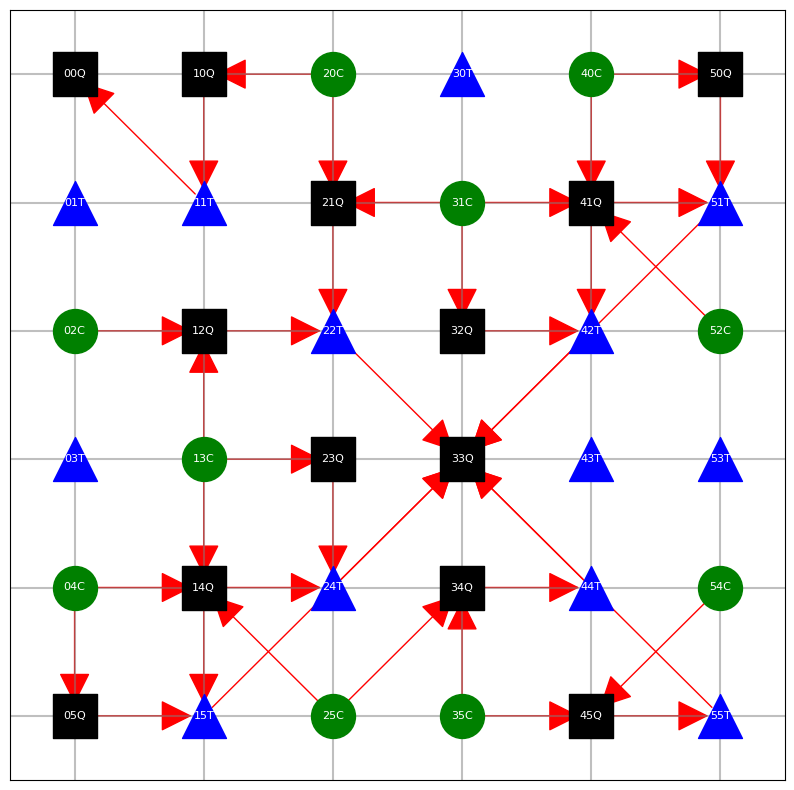

In [163]:
# Plotagem do grafo
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = len(MATRIZ)
n_cols = len(MATRIZ[0])

# Gridline para visualização do plano cartesiano
for i in range(n_rows + 1):
    ax.axhline(y=i - 0.5, color='gray', linestyle='-', alpha=0.5)
for j in range(n_cols + 1):
    ax.axvline(x=j - 0.5, color='gray', linestyle='-', alpha=0.5)

# Centraliza os nós no centro das células da matriz (ajuste para visualização)
pos_adjusted = {
    f"{x}{y}{numberToLetter[MATRIZ[y][x]]}": (x + 0.5, n_rows - y - 0.5)
    for y in range(n_rows) for x in range(n_cols)
}

nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "Q" in node],
                       node_color='black',
                       node_shape='s',
                       node_size=1000)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "T" in node],
                       node_color='blue',
                       node_shape='^',
                       node_size=1000)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "C" in node],
                       node_color='green',
                       node_shape='o',
                       node_size=1000)

# Plota as arestas (setas vermelhas entre os nós)
nx.draw_networkx_edges(GraphTestRules,
                       pos_adjusted,
                       edge_color='red',
                       arrows=True,
                       arrowsize=50)

# Adiciona rótulos aos nós (opcional)
nx.draw_networkx_labels(GraphTestRules,
                        pos_adjusted,
                        font_size=8,
                        font_color="white")

ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()

###2.6. Plot Final de Caminho com Estrela

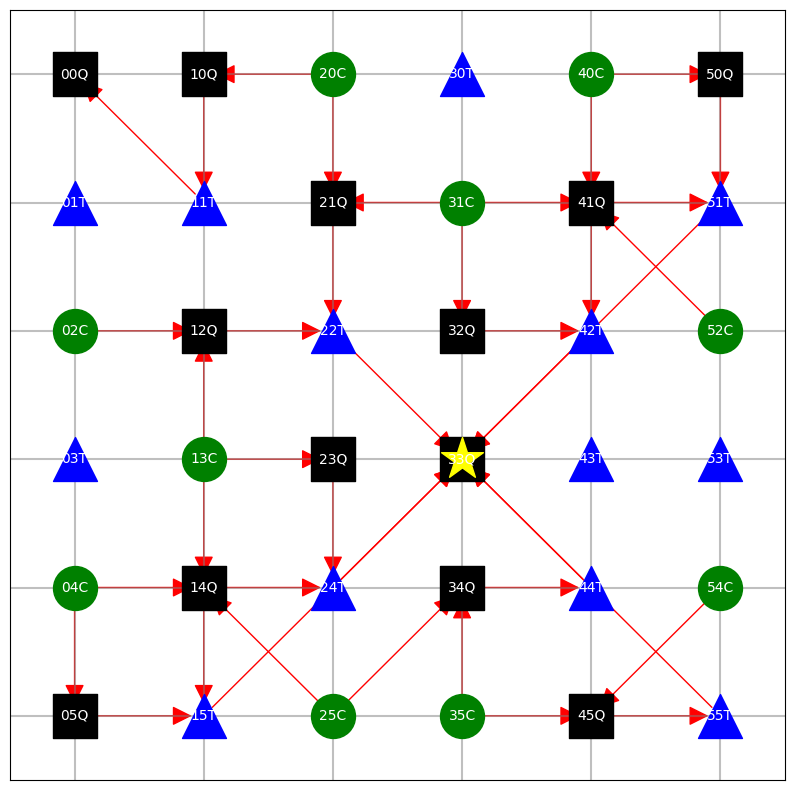

In [164]:
# Plotagem do grafo
fig, ax = plt.subplots(figsize=(10, 10))

n_rows = len(MATRIZ)
n_cols = len(MATRIZ[0])

# Gridline para visualização do plano cartesiano
for i in range(n_rows + 1):
    ax.axhline(y=i - 0.5, color='gray', linestyle='-', alpha=0.5)
for j in range(n_cols + 1):
    ax.axvline(x=j - 0.5, color='gray', linestyle='-', alpha=0.5)

# Centraliza os nós no centro das células da matriz (ajuste para visualização)
pos_adjusted = {
    f"{x}{y}{numberToLetter[MATRIZ[y][x]]}": (x + 0.5, n_rows - y - 0.5)
    for y in range(n_rows) for x in range(n_cols)
}


nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "Q" in node],
                       node_color='black',
                       node_shape='s',
                       node_size=1000)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "T" in node],
                       node_color='blue',
                       node_shape='^',
                       node_size=1000)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[node for node in GraphTestRules.nodes if "C" in node],
                       node_color='green',
                       node_shape='o',
                       node_size=1000)
nx.draw_networkx_nodes(GraphTestRules,
                       pos_adjusted,
                       nodelist=[f"{qdx}{qdy}{numberToLetter[MATRIZ[qdy][qdx]]}" for qdx, qdy in quadrado_diagonal_pos],
                       node_color='yellow',
                       node_shape='*',
                       node_size=1000)

# Plota as arestas (setas vermelhas entre os nós)
nx.draw_networkx_edges(GraphTestRules,
                       pos_adjusted,
                       edge_color='red',
                       arrows=True,
                       arrowsize=30)

# Adiciona rótulos aos nós (opcional)
nx.draw_networkx_labels(GraphTestRules,
                        pos_adjusted,
                        font_size=10,
                        font_color="white")


ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
plt.show()

In [ ]:
node_quadrado_diagonal